# Contributors

* Loukas Mastoropoulos 1115 2017 00078 
* Spyros Pikoulas      1115 2014 00158

# Notes 

*   You may want to change the path variable from where the initial pkl data file is loaded and also the bow,tfid files are stored later at section-question 3. There are comments hinting about it.
*   The bag of words data generated at 3. section-question is used at 5. section-question but a different bag of words generated for the 4 (so it is campatible with the function used). section-question
*   Using the whole dataset for a 10 cross validation takes significant time so you may want to reduce the train and test percentage of the data, which is able at section-question 3. The cross validation steps can be reduced at 5. section-question
*   Preprocesing occurs at 1. section-question and the data generated is used for 3. and 5. section-question but lemmatization occurs only at 4. section-question at the same already preprocessed data and is used only for 4.








# Εισαγωγή Δεδομένων


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle as pkl
from os.path import exists
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
path = 'drive/MyDrive/ΤΕΔ/' # <---- you may want to change path
df = pd.read_pickle(path+'Main Branch/sdi1700078/eclass_all_with_sentiment_v2.pkl') # <---- you may want to change path

# 1. Προεπεξεργασία και καθάρισμα των δεδομένων

In [4]:
# Check for duplicate ids
print("Duplicated ids: " + str(df.duplicated(subset=["id"]).sum()))
# Drop ids coulmn
df = df.drop(columns=["id"])
# Check for duplicated texts
print("Duplicated Texts: " + str(df.duplicated(subset=["text"]).sum()))
df = df.drop_duplicates(subset="text")

print()

# find NaN values
print("-Nan counts per column-")
for column in df.columns:
  print(column + ": " + str(df[column].isna().sum()))
# Users with NaN values as username violate the twitter terms so drop them
df = df.dropna(subset=["user_name"])

# Replace sentiments string with integers
label_dict = {'NEG': 0, 'NEU': 1, 'POS': 2}
df['sentiment'] = df['sentiment'].apply(lambda x: label_dict[x])

Duplicated ids: 0
Duplicated Texts: 1834

-Nan counts per column-
user_name: 2
user_location: 65337
user_description: 16959
user_created: 0
user_followers: 0
user_friends: 0
user_favourites: 0
user_verified: 0
date: 0
text: 0
hashtags: 49703
source: 119
retweets: 0
favorites: 0
is_retweet: 0
sentiment: 0


In [5]:
column = 'text'

# Links
df[column] = df[column].replace(to_replace=r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*", value="", regex=True)
# Punctuation
df[column] = df[column].str.replace('[^\w\s]','')
# Capitals
df[column] = df[column].str.lower()
# Stopwords
df[column] = df[column].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
# Numbers
df[column] = df[column].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
# Check for duplicated texts after cleaning
print("Duplicated Texts: " + str(df.duplicated(subset=["text"]).sum()) + " to be dropped")
df = df.drop_duplicates(subset="text")

df = df.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Duplicated Texts: 51957 to be dropped


# 2. Ανάλυση των Δεδομένων

## 2.1

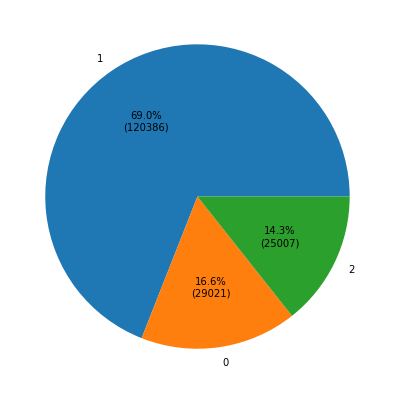

In [ ]:
# Create data
sents = df["sentiment"].unique()
sents_count = df["sentiment"].value_counts()

def pct_fun(x):
    return '{:.1f}%\n({:.0f})'.format(x, sents_count.sum()*x/100)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sents_count, autopct=pct_fun, labels = sents)
 
# show plot
plt.show()

## 2.2

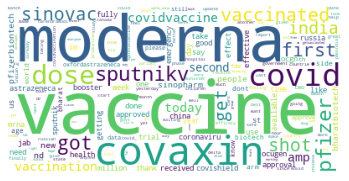

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(
    background_color='white',
    stopwords=stop,
    collocations=False
)
wc.generate(' '.join(df['text']))
plt.imshow(wc)
plt.axis("off")
plt.show()


## 2.3

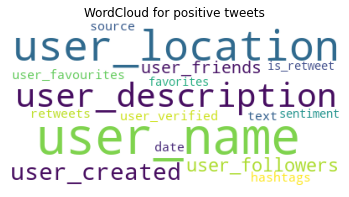

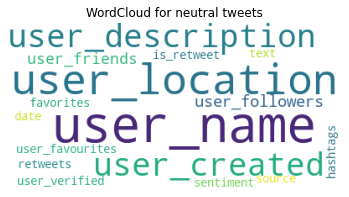

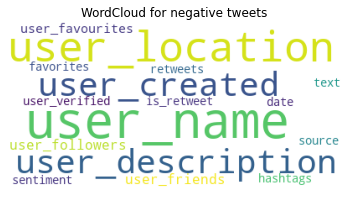

In [ ]:
pos = df[df["sentiment"] == "pos"]
neg = df[df["sentiment"] == "neg"]
neu = df[df["sentiment"] == "neu"]


wc.generate(' '.join(pos))
plt.imshow(wc)
plt.title("WordCloud for positive tweets")
plt.axis("off")
plt.show()

wc.generate(' '.join(neu))
plt.imshow(wc)
plt.title("WordCloud for neutral tweets")
plt.axis("off")
plt.show()

wc.generate(' '.join(neg))
plt.imshow(wc)
plt.title("WordCloud for negative tweets")
plt.axis("off")
plt.show()



## 2.4

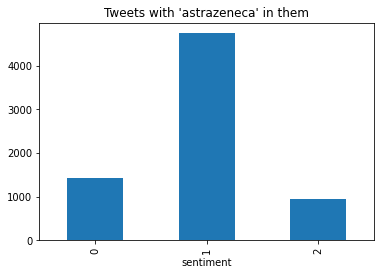

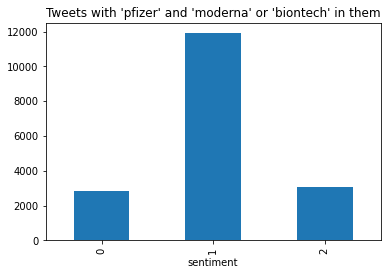

In [ ]:
astra = df[df['text'].str.contains('astrazeneca')]
other = df[((df['text'].str.contains('pfizer')) & (df['text'].str.contains('moderna'))) | (df['text'].str.contains('biontech'))]


astra.groupby(['sentiment']).agg(np.size)['user_name'].plot(kind='bar')
plt.title("Tweets with 'astrazeneca' in them")
plt.show()

print()
other.groupby(['sentiment']).agg(np.size)['user_name'].plot(kind='bar')
plt.title("Tweets with 'pfizer' and 'moderna' or 'biontech' in them")
plt.show()


## 2.5

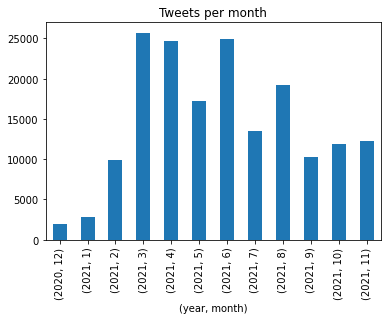

In [ ]:
df.groupby([pd.to_datetime(df.date).dt.year,pd.to_datetime(df.date).dt.month]).agg(np.size)['user_name'].plot(kind='bar')
plt.title("Tweets per month")
plt.xlabel("(year, month)")
plt.show()


## 2.6

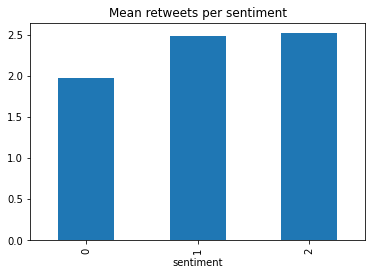

In [ ]:
df.groupby(df.sentiment).agg(np.mean)['retweets'].plot(kind='bar')
plt.title("Mean retweets per sentiment")
plt.show()




# **3**

In [6]:
!pip install --upgrade gensim
import gensim.downloader as api
glove_vectors = api.load('glove-twitter-25')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 39.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[==================================================] 100.0% 104.8/104.8MB downloaded


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Train Percentage of data (must train_perc+test_perc < 100)
train_perc = 10 # you may want to reduce it, because the cross validation takes some time
train_perc_count = int(df.shape[0]*train_perc/100)
train_df = df[["text","sentiment"]][0:train_perc_count]

# Test Percentage of data
test_perc = 10 # you may want to reduce it, because the cross validation takes some time
test_perc_count = int(df.shape[0]*test_perc/100)
test_df = df[["text","sentiment"]][-test_perc_count:]

In [ ]:
# Bow // Bag of Words
train_bow_file = 'train_bow.npy'
test_bow_file = 'test_bow.npy'  
if exists(path+train_bow_file) and exists(path+test_bow_file): # <---- you may want to change path
  print("BOW Files already exist")
  with open(path+train_bow_file,'rb') as f: train_bow_df = pkl.load(f)   # <---- you may want to change path      
  with open(path+test_bow_file,'rb') as f: test_bow_df = pkl.load(f)     # <---- you may want to change path
else:
  print("BOW Files being created and stored")
  vect = CountVectorizer()
  vect.fit(train_df.append(test_df)["text"])
  train_bow_df = vect.transform(train_df['text'])
  test_bow_df = vect.transform(test_df['text'])
  with open(path+train_bow_file,'wb') as f: pkl.dump(train_bow_df, f)   # <---- you may want to change path
  with open(path+test_bow_file,'wb') as f: pkl.dump(test_bow_df, f)     # <---- you may want to change path

# Tf-idf
train_tfidf_file = 'train_tfidf.npy'
test_tfidf_file = 'test_tfidf.npy'  
if exists(path+train_tfidf_file) and exists(path+test_tfidf_file):   # <---- you may want to change path
  print("TFIDF Files already exist")
  with open(path+train_tfidf_file,'rb') as f: train_tfidf_df = pkl.load(f)          # <---- you may want to change path
  with open(path+test_tfidf_file,'rb') as f: test_tfidf_df = pkl.load(f)            # <---- you may want to change path
else:
  print("TFIDF Files being created and stored")
  tfidf_vect = TfidfVectorizer()
  tfidf_vect.fit(train_df.append(test_df)["text"])
  train_tfidf_df = tfidf_vect.transform(train_df["text"])
  test_tfidf_df = tfidf_vect.transform(test_df["text"])
  with open(path+train_tfidf_file,'wb') as f: pkl.dump(train_tfidf_df, f)         # <---- you may want to change path
  with open(path+test_tfidf_file,'wb') as f: pkl.dump(test_tfidf_df, f)           # <---- you may want to change path

BOW Files already exist
TFIDF Files already exist


In [ ]:
# Word2vec
# Train data embeddings
w2v_dict = glove_vectors.key_to_index.keys()
train_emb = []
train_max_count = 0
for txt in train_df["text"].values:
  text_emb = []
  for word in txt.split():
    if word in w2v_dict:
      text_emb.append(glove_vectors[word].mean())
  # max features count
  if len(text_emb) > train_max_count:
    train_max_count = len(text_emb)
  train_emb.append(text_emb)

print("Train data max features-embeddings: ", train_max_count)

# Test data embeddings
test_emb = []
test_max_count = 0
for txt in test_df["text"].values:
  text_emb = []
  if len(txt.split()) > test_max_count:
    test_max_count = len(txt.split())
  for word in txt.split():
    if word in w2v_dict:
      text_emb.append(glove_vectors[word].mean())
  # max features count
  if len(text_emb) > test_max_count:
    test_max_count = len(text_emb)
  test_emb.append(text_emb)

print("Test data max features-embeddings: ", test_max_count)

# We need same length features so we keep the min from train or test
features_count = train_max_count if train_max_count <= test_max_count else test_max_count

print("Final features count: ", features_count)

# We need our train and test dataset to have same feature size 
# so we chose the minimum max from test and train data features.
# We fill with zeros the samples smaller than feature_count
# and shrink the samples that are bigger than features count

# Train dataset
for ind, features in enumerate(train_emb):
  # Fill with zeros if smaller
  if len(features) <= features_count:
    zero_list = [0.0] * (features_count - len(features))
    train_emb[ind].extend(zero_list)
  else: # Shring if bigger
     train_emb[ind] =  features[:features_count]

# list of lists to array
train_emb = np.array(train_emb)



#Ttest dataset
for ind, features in enumerate(test_emb):
  # Fill with zeros if smaller
  if len(features) <= features_count:
    zero_list = [0.0] * (features_count - len(features))
    test_emb[ind].extend(zero_list)
  else: # Shring if bigger
     test_emb[ind] =  features[:features_count]

# list of lsits to array
test_emb = np.array(test_emb)

Train data max features-embeddings:  18
Test data max features-embeddings:  20
Final features count:  18


# 4

In [ ]:
## Imports

In [ ]:
import json
import glob

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

!pip install pyLDAvis
import spacy
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4b63f300bf6a5a2a06cc9acaa8ad410b37ef8c3afc0671b9b1050270e9b97493
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## Lemmatization

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  texts_out = []
  for text in texts:
    doc = nlp(text)
    new_text = []
    for token in doc:
      if token.pos_ in allowed_postags:
        new_text.append(token.lemma_)
    final = " ".join(new_text)
    texts_out.append(final)
  return (texts_out)

In [ ]:
data = []

#to change to all
for text in df['text'][0:1000]:
  data.append(str(text))

lemmatized_texts = lemmatization(data)

for index, text in enumerate(data):
  lemmatized_texts[index] = ' '.join([item for item in lemmatized_texts[index].split() if item not in stop])


## Word Preprocessing

In [ ]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return (final)


data_words = gen_words(lemmatized_texts)

## BOW Usage

In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
  new = id2word.doc2bow(text)
  corpus.append(new)


## Find Best LDA Model with Topic Coherence

In [ ]:

# Compute Coherence Score
max = -1
maxTopics = 0
for i in range(3, 16):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  if max < coherence_lda : 
    max = coherence_lda
    maxTopics = i

print(max, maxTopics)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=maxTopics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

0.585832847213816 10


## Visualizing the Data

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.397235 -0.171496       1        1  35.339183
4     -0.070742  0.348350       2        1  13.447184
7     -0.254341  0.164810       3        1   9.751973
6      0.191665 -0.261930       4        1   9.244199
8      0.292299 -0.057899       5        1   7.512008
1      0.250953  0.117919       6        1   6.495897
3      0.108989  0.211787       7        1   5.678197
9     -0.034932 -0.256243       8        1   4.421226
0     -0.104324 -0.008647       9        1   4.345080
2      0.017668 -0.086652      10        1   3.765053, topic_info=                Term        Freq       Total Category  logprob  loglift
3     pfizerbiontech  374.000000  374.000000  Default  30.0000  30.0000
18           vaccine  433.000000  433.000000  Default  29.0000  29.0000
95           approve   60.000000   60.000000  Default  28.0000  28.0000
108              use   59.000000   59.000000  Default  27.0000  27.0000
58            people   39.000000   39.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
477              ago    1.303533    1.969079  Topic10  -5.1781   2.8669
258        physician    1.195089    1.860658  Topic10  -5.2650   2.8367
266            later    1.194479    1.860286  Topic10  -5.2655   2.8364
1092          period    1.132394    1.798001  Topic10  -5.3188   2.8171
80         vaccinate   12.868664   23.491635  Topic10  -2.8884   2.6776

[344 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
396       5  0.758454        able
1630      8  0.916830    absolute
474       9  0.862526      access
171       1  0.975765  administer
745       3  0.959726     adverse
...     ...       ...         ...
102       2  0.966232       world
141       2  0.930363       worry
270       5  0.909530       would
14        3  0.927691        year
597       7  0.866847   yesterday

[315 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 8, 7, 9, 2, 4, 10, 1, 3])

# 5. Classifiers-10 Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import sklearn

scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
cv=2 # 10 Cross Validation takes some time for each data type and each classifier, you may want to reduce it

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

### Bag of Words

In [ ]:
# Training Data
X_train = train_bow_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_bow_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

Metrics for each cross validation

Cross Validation 0
precision_macro: 0.7516732759049951
recall_macro: 0.5440001260703852
f1_macro: 0.5742715965437725
accuracy: 0.7589725948859076

Cross Validation 1
precision_macro: 0.7804381753971087
recall_macro: 0.4975725973654919
f1_macro: 0.5312012670846279
accuracy: 0.7474770642201835

Metrics on the test set (Evaluation)
Accuracy
0.730692047474342
Recall
0.4995183044118448
F1
0.5228999162860034
Precision
0.7491550191772683


### TF-IDF

In [ ]:
# Training Data
X_train = train_tfidf_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_tfidf_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

### Word Embeddings

In [ ]:
# Training Data
X_train = train_emb
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_emb
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

## SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)

### Bag of Words

In [ ]:
# Training Data
X_train = train_bow_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_bow_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

### TF-IDF

In [ ]:
# Training Data
X_train = train_tfidf_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_tfidf_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

### Word Embeddings

In [ ]:
# Training Data
X_train = train_emb
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_emb
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

### Bag of Words

In [ ]:
# Training Data
X_train = train_bow_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_bow_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

### TF-IDF

In [ ]:
# Training Data
X_train = train_tfidf_df
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_tfidf_df
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))

### Word Embeddings

In [ ]:
# Training Data
X_train = train_emb
Y_train = train_df["sentiment"]

# Cross Validation
scores = cross_validate(clf, X_train, Y_train, scoring=scoring, cv=cv, return_estimator=True)

# Metrics
print('Metrics for each cross validation')
max_f1 = 0
max_f1_pot = 0
for t in range(cv):
  print()
  print('Cross Validation '+ str(t))
  for s in scoring:
    print(s+": "+str(scores["test_"+s][t]))
    if s == 'f1_macro' and max_f1<scores["test_"+s][t]: # find the estimator with the best f1 score to evaluate later on the test set
      max_f1 = scores["test_"+s][t]
      max_f1_pot = t

# Evaluation on the test set
print()
print('Metrics on the test set (Evaluation)')
X_test = test_emb
Y_test = test_df["sentiment"]
predictions = scores['estimator'][max_f1_pot].predict(X_test)

print('Accuracy'); print(accuracy_score(Y_test, predictions))
print('Recall'); print(recall_score(Y_test, predictions, average='macro'))
print('F1'); print(f1_score(Y_test, predictions, average='macro'))
print('Precision'); print(precision_score(Y_test, predictions, average='macro'))